# Monte Carlo Simulation in Retail Industry: How to make informed decisions when you don't have enough data

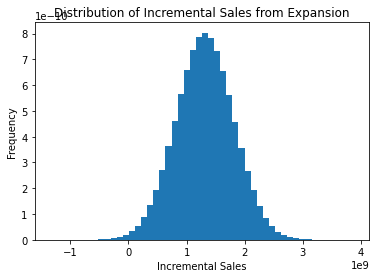

Mean incremental sales: 1314644111.567895
Standard deviation of incremental sales: 495779190.1705658
Expanding the store size is expected to generate incremental sales.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the sales data
sales_data = pd.read_csv("sales_data1.csv")
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data = sales_data.set_index('date')

# Create a variable for the fixed store size
sales_data['fixed_size'] = 14197

# Define the parameters for the simulation (we are running 20 million random scenarios)
mean_sales = sales_data['sales'].mean()
std_sales = sales_data['sales'].std()
num_iterations = 20000000
expanded_size = 50000

# Run the Monte Carlo simulation
incremental_sales = []
for i in range(num_iterations):
    sampled_sales = np.random.normal(mean_sales, std_sales)
    original_sales = sampled_sales * (15000 / 15000)
    expanded_sales = sampled_sales * (expanded_size / 15000)
    incremental_sales.append(expanded_sales - original_sales)

# Plot the distribution of incremental sales
plt.hist(incremental_sales, bins=50, density=True)
plt.xlabel("Incremental Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Incremental Sales from Expansion")
plt.show()

# Calculate the mean and standard deviation of incremental sales
mean_incremental_sales = np.mean(incremental_sales)
std_incremental_sales = np.std(incremental_sales)

# Print the results
print("Mean incremental sales:", mean_incremental_sales)
print("Standard deviation of incremental sales:", std_incremental_sales)


# Compare the mean sales for each scenario
if mean_incremental_sales > mean_sales:
    print("Expanding the store size is expected to generate incremental sales.")
else:
    print("Expanding the store size is not expected to generate incremental sales.")
